In [88]:
import pandas as pd
import numpy as np


#Apply these operations on test set also by importing it ( concatenate test and train then do this for the combined dataset)

train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv",index_col=0)
rows=train.shape[0] # 1460 by 80


def combine_data(train,test):
    temp=train
    house_data=pd.concat([temp.drop(['SalePrice'],axis=1),test],axis=0) #whole data contained in this, shape= 2919 x 79
    true_data=train['SalePrice']
    del temp
    return house_data,true_data

def checknans(df):
    nan_cols=df.columns[df.isnull().any()].tolist()
    return(df[nan_cols].isnull().sum())

def cat_variables_counts(col,df):
    return(df[col].value_counts())

def cat_fillvalue(col,df,val):
    df.loc[df[col].isnull(),col] = val


def genpolynomials(x,a):
    return(x**a)


#house_data has the combined test and train data with SalePrice dropped
#true_data consists of the SalePrice column which is the true set of labels

house_data,true_data=combine_data(train,test)



######################------Pre processing-------#########################


#Filling empty Nan Values and empty columns


cat_variables_counts('Alley',house_data) #too many NaN values
cat_fillvalue('Alley',house_data,'None')
cat_variables_counts('FireplaceQu',house_data) #too many NaN values, hence drop it
cat_fillvalue('FireplaceQu',house_data,'None')
cat_variables_counts('PoolQC',house_data) 
cat_fillvalue('PoolQC',house_data,'None')
pd.isnull(house_data['PoolQC']).sum() #Total NaNs = 2909
cat_variables_counts('PoolArea',house_data) 
#Since most of the PoolArea is 0, therefore there are lot of NaN values in PoolQC
#Hence we drop PoolQC 
cat_variables_counts('MiscFeature',house_data) #too many NaN values, hence drop it
cat_fillvalue('MiscFeature',house_data,'None')
cat_variables_counts('Fence',house_data) #too many NaN values, hence drop it
cat_fillvalue('Fence',house_data,'None')

#house_data.drop([ 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1, inplace=True)

In [89]:
checknans(house_data).sort_values(inplace=False)
checknans(house_data).plot.bar()

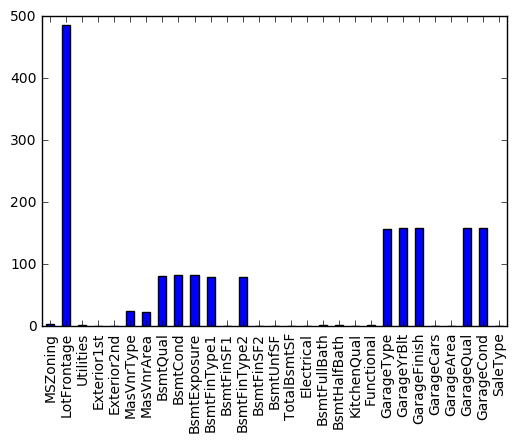

In [90]:
plt.show()

In [91]:
checknans(house_data)

MSZoning          4
LotFrontage     486
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

In [92]:
cat_variables_counts('Alley',house_data) #too many NaN values
cat_fillvalue('Alley',house_data,'None')
cat_variables_counts('FireplaceQu',house_data) #too many NaN values, hence drop it
cat_fillvalue('FireplaceQu',house_data,'None')
cat_variables_counts('PoolQC',house_data) 
cat_fillvalue('PoolQC',house_data,'None')
pd.isnull(house_data['PoolQC']).sum() #Total NaNs = 2909
cat_variables_counts('PoolArea',house_data) 
#Since most of the PoolArea is 0, therefore there are lot of NaN values in PoolQC
#Hence we drop PoolQC 
cat_variables_counts('MiscFeature',house_data) #too many NaN values, hence drop it
cat_fillvalue('MiscFeature',house_data,'None')
cat_variables_counts('Fence',house_data) #too many NaN values, hence drop it
cat_fillvalue('Fence',house_data,'None')

#house_data.drop([ 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1, inplace=True)

In [93]:
cat_variables_counts('Electrical',house_data) #SBrkr is the most frequent value
cat_fillvalue('Electrical',house_data,'SBrkr') #Filled NaNs with most frequent value
cat_variables_counts('MSZoning',house_data) #RL is most frequent
cat_fillvalue('MSZoning',house_data,'RL') #Filled NaNs with most frequent value
cat_variables_counts('KitchenQual',house_data) #Filled NaNs with most frequent value
cat_fillvalue('KitchenQual',house_data,'TA') #Filled NaNs with most frequent value
cat_variables_counts('Functional',house_data) #Filled NaNs with most frequent value
cat_fillvalue('Functional',house_data,'Typ') #Filled NaNs with most frequent value
cat_fillvalue('SaleType',house_data,'WD') #Filled NaNs with most frequent value
house_data['MasVnrType'][house_data['MasVnrType'].isnull()==True] #Replace NaN values with None
cat_variables_counts('MasVnrType',house_data) #Fill None with NaN as it is the most common
house_data['MasVnrArea'][house_data['MasVnrArea'].isnull()==True] #Replace NaN values with 0
cat_variables_counts('MasVnrArea',house_data) # Fill None with NaN as it is the most common
house_data[['MasVnrType','MasVnrArea']][house_data['MasVnrArea'].isnull()==True] #Both columns have NaNs at common ids
cat_fillvalue('MasVnrType',house_data,'None')
cat_fillvalue('MasVnrArea',house_data,0.0)
cat_fillvalue('Utilities',house_data,'AllPub') #filled with most frequent value




In [94]:
cat_variables_counts('Exterior1st',house_data)
cat_fillvalue('Exterior1st',house_data,'VinylSd')
del house_data['Exterior2nd'] #since most of values of Exterior1st and Exterior2nd are equal hence drop Exterior2nd


In [95]:
#LotArea/LotFrontage variables

names=house_data['LotArea'][house_data['LotFrontage'].isnull()] #Find out NaNs in LotFrontage
house_data['LotFrontage'][house_data['LotFrontage'].isnull()]=np.sqrt(names) #Fill NaNs with square root of LotArea for observations having NaN Values
house_data['LotFrontage'].corr(house_data['LotArea']) #Correlation increases to 0.62, hence filling squareroot of area is justified

/home/siddhant/python/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.62668688988431842

In [96]:
#Basement Variables

r=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
house_data[r][house_data['BsmtQual'].isnull()]
cat_fillvalue('BsmtQual',house_data,'None')
cat_fillvalue('BsmtFinType1',house_data,'None')
cat_fillvalue('BsmtFinType2',house_data,'None')
cat_fillvalue('BsmtCond',house_data,'None')
cat_fillvalue('BsmtExposure',house_data,'None')
cat_fillvalue('BsmtFinSF1',house_data,0.0)
cat_fillvalue('BsmtFinSF2',house_data,0.0)
cat_fillvalue('BsmtUnfSF',house_data,0.0)
cat_fillvalue('TotalBsmtSF',house_data,0.0)
cat_fillvalue('BsmtFullBath',house_data,0.0)
cat_fillvalue('BsmtHalfBath',house_data,0.0)



In [97]:
#Garage Variables

garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
house_data[garage_cols][house_data['GarageType'].isnull()==True]
cat_fillvalue('GarageType',house_data,'None')
cat_fillvalue('GarageQual',house_data,'None')
cat_fillvalue('GarageCond',house_data,'None')
cat_fillvalue('GarageYrBlt',house_data,'None')
cat_fillvalue('GarageFinish',house_data,'None')
cat_fillvalue('GarageCars',house_data,0.0)
cat_fillvalue('GarageArea',house_data,0.0)

In [98]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


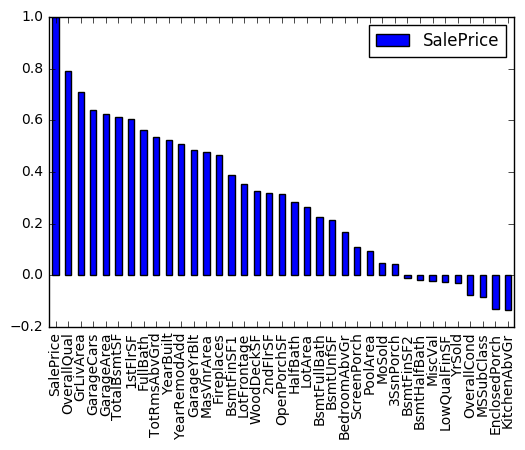

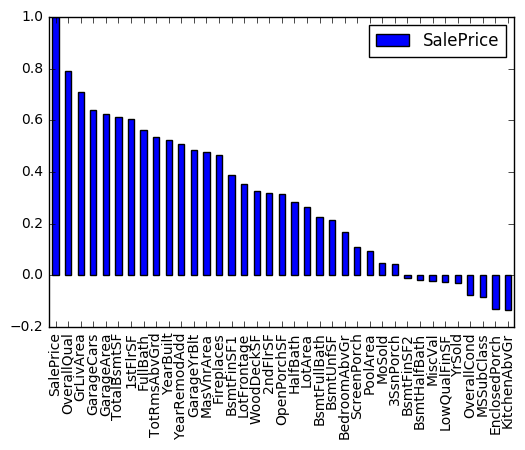

In [108]:
corr_plot=pd.DataFrame(corr.SalePrice)
corr_plot.plot.bar()
plt.show()

In [57]:
#Generating Polynomial Features for 5 correlated columns
house_data["OverallQual-deg2"]=genpolynomials(house_data["OverallQual"],2)
house_data["OverallQual-deg3"]=genpolynomials(house_data["OverallQual"],3)
house_data["GrLivArea-deg2"]=genpolynomials(house_data["GrLivArea"],2)
house_data["GrLivArea-deg3"]=genpolynomials(house_data["GrLivArea"],3) #Correlation very low with SalePrice, hence delete it
house_data["GarageCars-deg2"]=genpolynomials(house_data["GarageCars"],2)
house_data["GarageCars-deg3"]=genpolynomials(house_data["GarageCars"],3)
house_data["GarageArea-deg2"]=genpolynomials(house_data["GarageArea"],2)
house_data["GarageArea-deg3"]=genpolynomials(house_data["GarageArea"],3)
#house_data["TotalBsmtSF-deg2"]=genpolynomials(house_data["TotalBsmtSF"],2)
#house_data["TotalBsmtSF-deg3"]=genpolynomials(house_data["TotalBsmtSF"],3)
#house_data["1stFlrSF-deg2"]=genpolynomials(house_data["1stFlrSF"],2)
#house_data["1stFlrSF-deg3"]=genpolynomials(house_data["1stFlrSF"],3)
#house_data["FullBath-deg2"]=genpolynomials(house_data["FullBath"],2)
#house_data["FullBath-deg3"]=genpolynomials(house_data["FullBath"],3)
#house_data["TotRmsAbvGrd-deg2"]=genpolynomials(house_data["TotRmsAbvGrd"],2)
#house_data["TotRmsAbvGrd-deg3"]=genpolynomials(house_data["TotRmsAbvGrd"],3)
# house_data['YearBuilt-deg2']=genpolynomials(house_data["YearBuilt"],2)
# house_data['YearBuilt-deg3']=genpolynomials(house_data["YearBuilt"],3)

house_data["OverallQual_GrLivArea"]=house_data['OverallQual']*house_data['GrLivArea']
house_data["OverallQual_GarageCars"]=house_data['OverallQual']*house_data['GarageCars']
house_data["GarageCars_GrLivArea"]=house_data['GarageCars']*house_data['GrLivArea']
house_data['OverallQual_GarageArea']=house_data['GarageArea']*house_data['OverallQual']
house_data['GarageCars_GarageArea']=house_data['GarageArea']*house_data['GarageCars']
house_data['GrLivArea_GarageArea']=house_data['GarageArea']*house_data['GrLivArea']
house_data["OverallQual_TotalBsmtSF"]=house_data['OverallQual']*house_data['TotalBsmtSF']
house_data["OverallQual_1stFlrSF"]=house_data['OverallQual']*house_data['1stFlrSF']
house_data["GrLivArea_TotalBsmtSF"]=house_data['GrLivArea']*house_data['TotalBsmtSF']
house_data["GrLivArea_1stFlrSF"]=house_data['GrLivArea']*house_data['1stFlrSF']
house_data["GarageCars_1stFlrSF"]=house_data['GarageCars']*house_data['1stFlrSF']
house_data["GarageCars_TotalBsmtSF"]=house_data['GarageCars']*house_data['TotalBsmtSF']
house_data["GarageArea_1stFlrSF"]=house_data['GarageArea']*house_data['1stFlrSF']
house_data["GarageArea_TotalBsmtSF"]=house_data['GarageArea']*house_data['TotalBsmtSF']
#house_data["1stFlrSF_TotalBsmtSF"]=house_data['1stFlrSF']*house_data['TotalBsmtSF']
#house_data["OverallQual_FullBath"]=house_data['OverallQual']*house_data['FullBath']
#house_data["OverallQual_TotRmsAbvGrd"]=house_data['OverallQual']*house_data['TotRmsAbvGrd']




#house_data['YearBuilt-deg3'].corr(train['SalePrice'])

In [58]:
house_data.dtypes

MSSubClass                   int64
MSZoning                    object
LotFrontage                float64
LotArea                      int64
Street                      object
Alley                       object
LotShape                    object
LandContour                 object
Utilities                   object
LotConfig                   object
LandSlope                   object
Neighborhood                object
Condition1                  object
Condition2                  object
BldgType                    object
HouseStyle                  object
OverallQual                  int64
OverallCond                  int64
YearBuilt                    int64
YearRemodAdd                 int64
RoofStyle                   object
RoofMatl                    object
Exterior1st                 object
MasVnrType                  object
MasVnrArea                 float64
ExterQual                   object
ExterCond                   object
Foundation                  object
BsmtQual            

In [59]:
#Encoding of categorical variables
house_data_encoded=pd.get_dummies(house_data)




#Normalize data 
Norm_data=np.log1p(house_data_encoded)
Norm_data_true=np.log1p(true_data)

#Split into Training set and Test set
Train_data=Norm_data[:rows]
Test_data=Norm_data[rows:]

In [60]:


def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, Train_data, Norm_data_true, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

NameError: name 'cross_val_score' is not defined

In [ ]:
from sklearn.model_selection import 

In [337]:
pp=np.exp(lr.predict(Train_data))
np.sqrt(np.mean(np.square(((pp -true_data.values)))))
#true_data.values.shape
#pp.shape

NameError: name 'lr' is not defined

In [64]:
lr.score(Train_data.values, Norm_data_true.values)

0.9493387295114718

In [61]:
#Ridge regression ( or regularization)
score=[]
rmse=[]
from sklearn.linear_model import Ridge
alphas=[0.001, 0.003, 0.005, 0.01, 0.03, 0.1, 0.3, 0.5, 1, 3, 4, 5, 10, 15, 30, 50]
for i in alphas:
    rr=Ridge(i,fit_intercept=True)
    rr.fit(Train_data.values, Norm_data_true.values)
    score.append(rr.score(Train_data.values, Norm_data_true.values)) # R^2 score
    rpred=np.exp(rr.predict(Train_data))
    rmse.append(np.sqrt(np.mean(np.square((rpred-true_data.values)))))

In [62]:
print(Norm_data_true.shape,'\n')
print(Train_data.shape,'\n')
print(true_data.shape,'\n')

(1460,) 

(1460, 411) 

(1460,) 



In [63]:
import matplotlib.pyplot as plt
rmse=pd.Series(rmse,index=alphas)
rmse.plot(title = "Rmse_Curve")
plt.xlabel("alpha")
plt.ylabel("rmse")
#

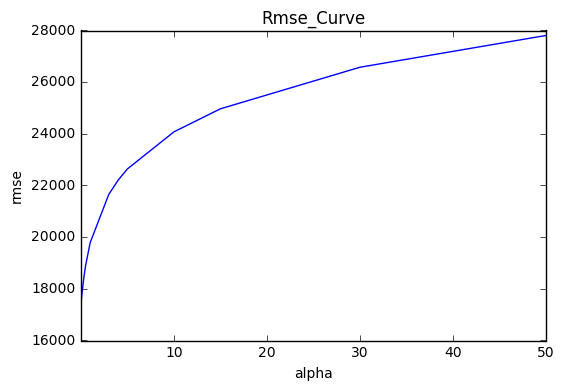

In [64]:
plt.show()

In [423]:
rr=Ridge(5,fit_intercept=True,max_iter=10000)
rr.fit(Train_data.values, Norm_data_true.values)
rr.coef_

rrpreds = pd.DataFrame({"SalePrice":rr.predict(Test_data)}, index=Test_data.index)
rrpreds.SalePrice=np.exp(rrpreds.SalePrice)


In [424]:
rrpreds.to_csv("rrpreds_5_addedpolynomials_2.csv") 

#This is the final file submitted to kaggle 

In [16]:
alphas=[0.1, 0.01, 0.001, 1, 0.3, 0.03, 0.003, 3, 0.5, 0.005, 15, 30, 50, 10, 5, 4]
sorted(alphas)

[0.001, 0.003, 0.005, 0.01, 0.03, 0.1, 0.3, 0.5, 1, 3, 4, 5, 10, 15, 30, 50]

In [67]:
results = pd.Series(score,index=alphas)
results.columns=["R Square Score"] 
results.plot(kind="bar",title="Model Scores")
axes = plt.gca()
axes.set_ylim([0.5,1])

(0.5, 1)

In [77]:
r=house_data_encoded*rr.coef_

In [78]:
r

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-1.106131,0.396263,458.275324,0.115584,0.482426,5.425576,8.153527,0.081142,7.998442,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.000000,0.0,-0.000000,-0.0,0.028631,0.000000
2,-0.368710,0.487708,520.644155,0.099072,0.771881,5.352441,8.043619,0.000000,11.079995,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.000000,0.0,-0.000000,-0.0,0.028631,0.000000
3,-1.106131,0.414552,610.129869,0.115584,0.482426,5.420159,8.149456,0.067066,5.506010,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.000000,0.0,-0.000000,-0.0,0.028631,0.000000
4,-1.290486,0.365781,517.932466,0.115584,0.482426,5.187208,8.019195,0.000000,2.447115,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.045659,0.0,-0.000000,-0.0,0.000000,0.000000
5,-1.106131,0.512094,773.373505,0.132096,0.482426,5.417450,8.141315,0.144896,7.420651,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.000000,0.0,-0.000000,-0.0,0.028631,0.000000
6,-0.921776,0.518190,765.509609,0.082560,0.482426,5.398489,8.120962,0.000000,8.293002,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.000000,0.0,-0.000000,-0.0,0.028631,0.000000
7,-0.368710,0.457227,546.893298,0.132096,0.482426,5.428285,8.161668,0.077002,15.509727,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.000000,0.0,-0.000000,-0.0,0.028631,0.000000
8,-1.106131,0.621170,563.054960,0.115584,0.578911,5.344315,8.031407,0.099357,9.731816,-0.049385,...,-0.0,0.000000,0.0,-0.017633,-0.000000,0.0,-0.000000,-0.0,0.028631,0.000000
9,-0.921776,0.310914,331.910649,0.115584,0.482426,5.230548,7.937782,0.000000,0.000000,-0.000000,...,-0.0,0.000000,0.0,-0.017633,-0.045659,0.0,-0.000000,-0.0,0.000000,0.000000
